In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import math
from scipy import special
from matplotlib.animation import FuncAnimation
plt.rcParams['animation.ffmpeg_path']='‪C:\\FFmpeg\bin\ffmpeg.exe'

erf = special.erf

In [2]:
x = np.linspace(-3,3,1000)
t = np.linspace(0.0000001,50,1000)
def Heat(x,t, alpha = 1):
    q = np.sqrt(4*alpha*t)
    return 1/2*(erf((1/2-x)/(q))-erf((-1/2-x)/(q)))

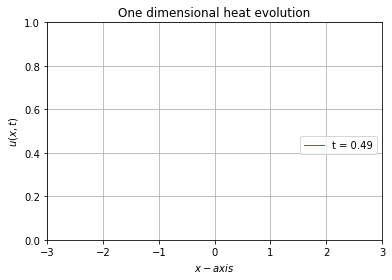

In [3]:
fig = plt.figure()
ax = plt.axes(xlim=(-3, 3), ylim=(0, 1), title = "One dimensional heat evolution")
line, = ax.plot([], [], lw=1)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    i = i*0.01
    if i != 0:
        y = Heat(x, i)
        line.set_data(x, y)
        line.set_label(f"t = {round(i,3)}")
        plt.legend(bbox_to_anchor=(1, 0.5))
    else:
        pass
    #print(i)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=50, blit=False)
ax.grid()
plt.xlabel(r"$x-axis$")
plt.ylabel(r"$u(x,t)$")

#anim.save('test.gif', writer='pillow')
anim.save('Task1.gif', fps=10, extra_args=['-vcodec', 'libx264'],
         writer = 'pillow')

plt.show()